## Preliminary Steps.

**Import Libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

**Read Data.**

In [2]:
df = pd.read_csv('candy-data.csv', encoding='utf-8')
df.drop_duplicates(inplace=True) # drop duplicates if any.
df.shape # num rows x num columns.

(85, 13)

## Data Preparation.

**Check for missing values.**

In [3]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

winpercent          0.0
pricepercent        0.0
sugarpercent        0.0
pluribus            0.0
bar                 0.0
hard                0.0
crispedricewafer    0.0
nougat              0.0
peanutyalmondy      0.0
caramel             0.0
fruity              0.0
chocolate           0.0
competitorname      0.0
dtype: float64

No missing values.

In [4]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


We have a total of 12 variables that describe a chocolate. 9 of them are categorical and the rest, i.e. 3 are numerical variables.

1. chocolate: Does it contain chocolate?
2. fruity: Is it fruit flavored?
3. caramel: Is there caramel in the candy?
4. peanutalmondy: Does it contain peanuts, peanut butter or almonds?
5. nougat: Does it contain nougat?
6. crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
7. hard: Is it a hard candy?
8. bar: Is it a candy bar?
9. pluribus: Is it one of many candies in a bag or box?
10. sugarpercent: The percentile of sugar it falls under within the data set.
11. pricepercent: The unit price percentile compared to the rest of the set.
12. winpercent: The overall win percentage according to 269,000 matchups.

In [5]:
df['winpercent'] = df['winpercent']/100

**Deriving new features.**

In [6]:
df['sugarbyprice'] = df['sugarpercent'].div(df['pricepercent']) # higher value means the candy is sweet as well as cheap.
df['winbyprice'] = df['winpercent'].div(df['pricepercent']) # higher value means the candy is more liked as well as cheap.

In [7]:
categorival_vars = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
                    'pluribus']
numerical_vars = ['sugarpercent', 'pricepercent', 'winpercent', 'sugarbyprice', 'winbyprice']

<hr>

## Data Understanding.

1. Top 10 winner candies.

In [8]:
df['competitorname'] = df['competitorname'].str.replace('Õ', "'") # Special character was appearing in name of candy.
df.sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,0.841803,1.105991,1.293092
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,0.818663,0.121864,2.934274
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,0.816429,0.602649,0.901136
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,0.767686,0.612524,1.502321
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,0.766738,0.838710,1.177785
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,0.734350,0.623656,1.128034
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,0.730996,0.927803,1.122881
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,0.728879,1.517665,1.119630
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,0.714651,1.267281,1.097773
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,0.707356,0.787484,0.922238


Reese's seem to be a favourite. Note that all the top competitors are chocolaty as well. Also, Reese's Miniatures is very cheap when compared to top competitors and overall as well.

2. Competitors which are not chocolaty but winners.

In [9]:
df[df['chocolate']==0].sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,0.670376,0.686364,3.047165
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,0.630851,4.277273,2.867506
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,0.598640,0.594828,5.160689
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,0.571197,1.000000,1.228382
41,Nerds,0,1,0,0,0,0,1,0,1,0.848,0.325,0.553540,2.609231,1.703201
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,0.551037,4.277273,2.504713
73,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604,0.755,0.548611,0.800000,0.726637
31,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,0.529114,0.956989,1.896466
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,0.528259,0.594828,4.553961
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,0.523415,1.772994,1.024295


Sour Patch Kids has a high `winbyprice`. They are cheap as well as a favourite.

3. Top `winbyprice` competitors.

In [10]:
df.sort_values(by=['winbyprice', 'winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,0.457367,15.818181,41.578862
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,0.377223,4.043478,16.401016
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,0.430889,3.735294,12.673212
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,0.394606,21.529410,11.606045
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,0.345790,9.810345,5.961895
22,Hershey's Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,0.553755,1.365591,5.954350
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,0.598640,0.594828,5.160689
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,0.528259,0.594828,4.553961
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,0.297037,10.608696,4.304883
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,0.347220,2.716049,4.286667


Tootsie Roll Midgies seems to give a bang for buck.

4. Top 10 sugary candies.

In [11]:
df.sort_values(by=['sugarpercent', 'winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,0.728879,1.517665,1.119630
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,0.643533,1.122093,0.748295
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,0.334375,1.258149,0.435952
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,0.630851,4.277273,2.867506
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,0.551037,4.277273,2.504713
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,0.523415,1.772994,1.024295
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,0.467833,2.000000,1.032745
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,0.380110,2.787692,1.169568
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,0.495241,1.028302,0.584011
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.872,0.325,0.464117,2.683077,1.428053


5. Which candies are both chocolaty as well as fruity?

In [12]:
df[(df['chocolate']==1)&(df['fruity']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.604,0.325,0.489827,1.858462,1.507159


<hr>

**Correlation Heatmap.**

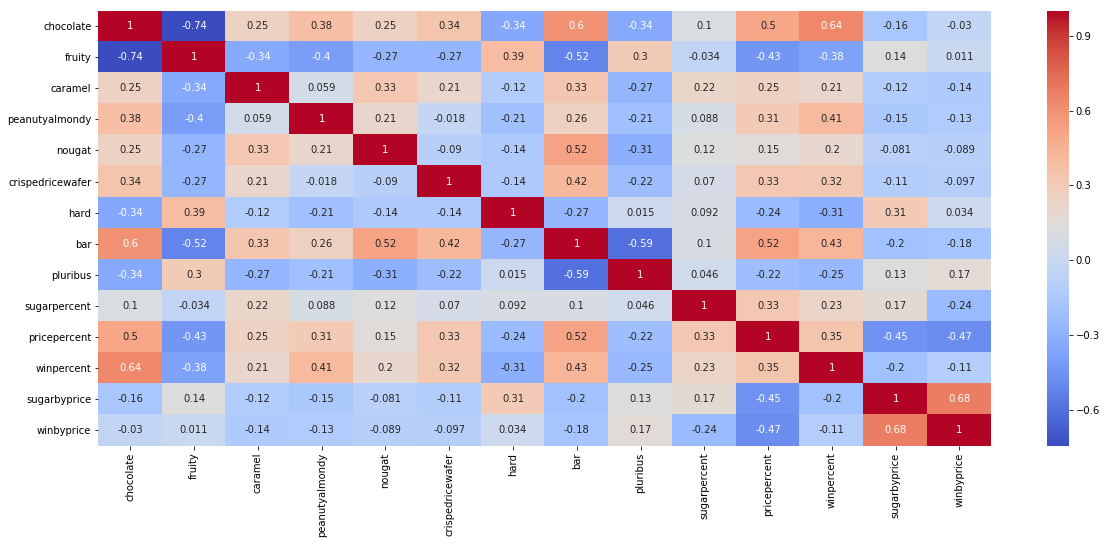

In [13]:
plt.figure(figsize = (20,8))        
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')

We do have some correlation between features. We can use PCA for treating correlation as well as dimensionality reduction.

## Principal Components Analysis.

**Perform PCA.**

scikit has 4 steps -> import, instantiate, fit, transform.

In [14]:
# Improting the PCA module. 

from sklearn.decomposition import PCA # import.
pca = PCA(svd_solver='randomized', random_state=123) #instantiate.
pca.fit(df.drop('competitorname', axis=1)) # fit.

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
  svd_solver='randomized', tol=0.0, whiten=False)

**Scree Plot.**

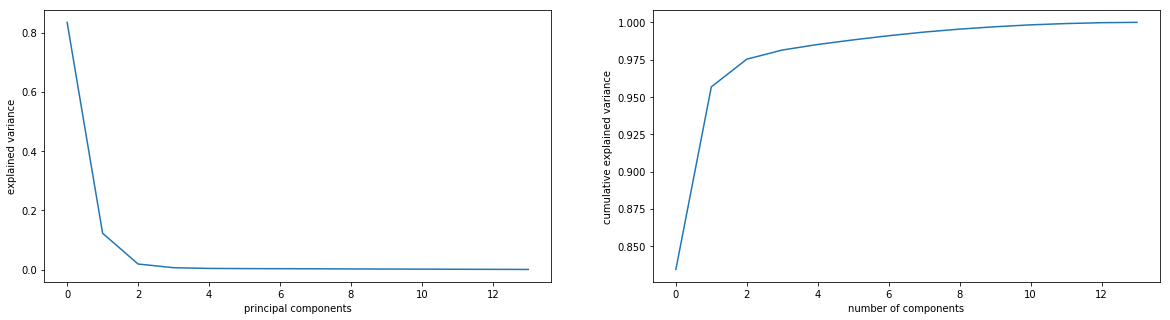

In [15]:
# Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (20,5))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principal components')
plt.ylabel('explained variance')

ax2 = plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

First 2 or 3 components are suggested by using the elbow method.

**Percentage of Variance retained.**

In [16]:
# what percentage of variance in data can be explained by first 2,3 and 4 principal components respectively?
(pca.explained_variance_ratio_[0:2].sum().round(3),
pca.explained_variance_ratio_[0:3].sum().round(3),
pca.explained_variance_ratio_[0:4].sum().round(3))

(0.957, 0.975, 0.981)

**Visualize Principal Components Loadings.**

In [17]:
# we'll use first 2 principal components as it retains 95% of variance.

df_pca_2_comp = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':df.drop(
                              'competitorname', axis=1).columns})
# df_pca_2_comp

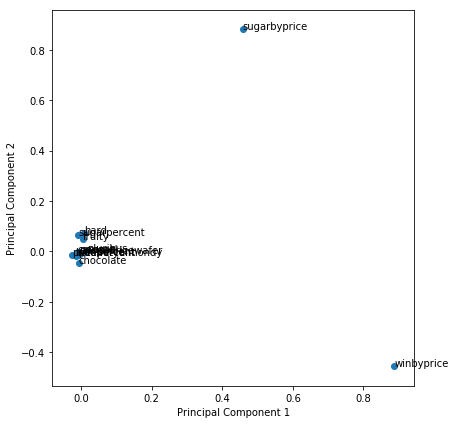

In [18]:
# we can visualize what the principal components seem to capture.

fig = plt.figure(figsize = (6,6))
plt.scatter(df_pca_2_comp.PC1, df_pca_2_comp.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca_2_comp.Feature):
    plt.annotate(txt, (df_pca_2_comp.PC1[i],df_pca_2_comp.PC2[i]))
plt.tight_layout()
plt.show()

Except `sugarbyprice` and `winbyprice`, all the other features seem to be clustered.

<hr>

**Transform Data.**

In [19]:
df_pca = pca.transform(df.drop('competitorname', axis=1)) # our data transformed with new features as principal components.
df_pca = df_pca[:, 0:2] # Since we require first two principal components only.

**Scale Data.**

In [20]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_s = standard_scaler.fit_transform(df_pca) # s in df_s stands for scaled.

**Visualize Principal Components.**

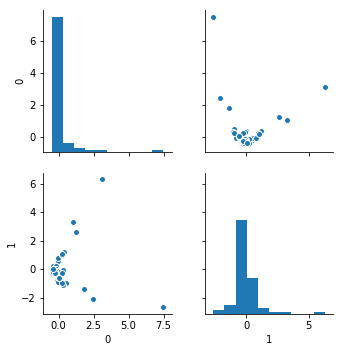

In [21]:
sns.pairplot(pd.DataFrame(df_s)) # Try to get some intuiton of data.

One cluster is very clearly visible. Seems to me that the second cluster will contain the data points not in the first cluster. Two clusters might suffice.

<hr>

## Clustering of Data.

**Is the data clusterable?**

Hopkin's Statstic will tell us if the data is clusterable or not. If it is less than 0.5, clusters are not statistically significant.

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
hopkins(pd.DataFrame(df_s))

0.979847182453404

Yes, Hopkin's statistic claims that this data is indeed highly clusterable.

<hr>

**Clustering.**

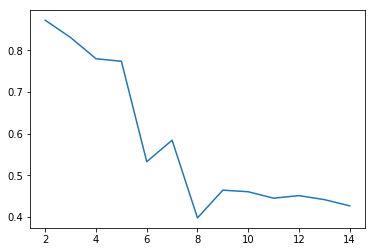

In [24]:
from sklearn.cluster import KMeans # import.

# silhouette scores to choose number of clusters.
from sklearn.metrics import silhouette_score
def sil_score(df):
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(df_s) # fit.
        sse_.append([k, silhouette_score(df, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

sil_score(df_s)

Maximum silhouette score at k=2.

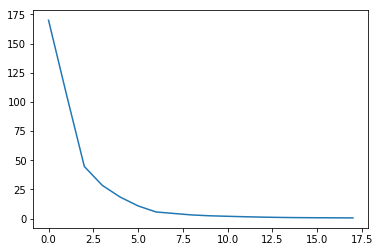

In [25]:
# sum of squared distances.

def plot_ssd(df):
    ssd = []
    for num_clusters in list(range(1,19)):
        model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state=123)
        model_clus.fit(df)
        ssd.append(model_clus.inertia_)
    plt.plot(ssd)

plot_ssd(df_s)

Elbow seems to form at 2.

<hr>

**K-Means with 2 clusters.**

In [26]:
# K-means with K=2.
km2c = KMeans(n_clusters=2, max_iter=50, random_state=93)
km2c.fit(df_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=93, tol=0.0001, verbose=0)

In [27]:
# creation of data frame with original features for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(df)
dfkm2c = pd.concat([df_dummy, pd.Series(km2c.labels_)], axis=1)
dfkm2c.rename(columns={0:'Cluster ID'}, inplace=True)
# dfkm2c.head()

In [28]:
# creation of data frame with features as principal components for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(pd.DataFrame(df_s))
dfpcakm2c = pd.concat([df_dummy, pd.Series(km2c.labels_)], axis=1)
dfpcakm2c.columns = ['PC1', 'PC2', 'Cluster ID']

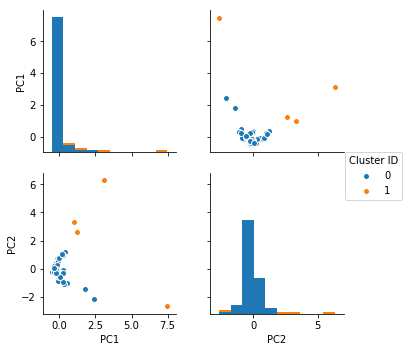

In [29]:
sns.pairplot(data=dfpcakm2c, vars=['PC1', 'PC2'], hue='Cluster ID')

<hr>

**K-means with 5 clusters.**

In [30]:
# K-means with K=5.
km5c = KMeans(n_clusters=5, max_iter=50, random_state=123)
km5c.fit(df_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [31]:
# creation of data frame with original features for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(df)
dfkm5c = pd.concat([df_dummy, pd.Series(km5c.labels_)], axis=1) # df-dataframe, km-kmeans, 5c-5clusters.
dfkm5c.rename(columns={0:'Cluster ID'}, inplace=True)
# dfkm5c.head()

In [32]:
# creation of data frame with features as principal components for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(pd.DataFrame(df_s))
dfpcakm5c = pd.concat([df_dummy, pd.Series(km5c.labels_)], axis=1)
dfpcakm5c.columns = ['PC1', 'PC2', 'Cluster ID']

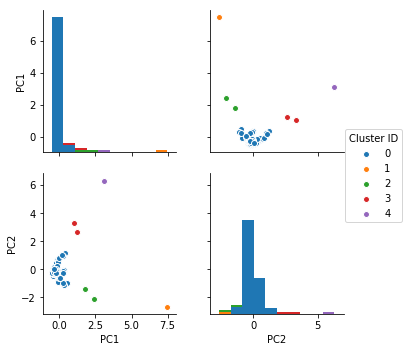

In [33]:
sns.pairplot(data = dfpcakm5c, vars=['PC1', 'PC2'], hue='Cluster ID')

## Analysis of Clusters.

Let's see how cluster 0 differs from the rest.

In [34]:
dfkm5c.groupby('Cluster ID').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
Cluster ID,,,,,,,,,,,,,,
0,0.455696,0.443038,0.177215,0.177215,0.088608,0.088608,0.151899,0.265823,0.493671,0.484278,0.501595,0.512232,1.190560,1.516441
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.174000,0.011000,0.457367,15.818181,41.578862
2,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.110000,0.028500,0.404056,3.889386,14.537114
3,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.650500,0.063500,0.321413,10.209521,5.133389
4,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.732000,0.034000,0.394606,21.529410,11.606045


In [35]:
dfkm5c[dfkm5c['Cluster ID']!=0]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice,Cluster ID
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,0.394606,21.529410,11.606045,4
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,0.430889,3.735294,12.673212,2
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,0.377223,4.043478,16.401016,2
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,0.297037,10.608696,4.304883,3
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,0.345790,9.810345,5.961895,3
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,0.457367,15.818181,41.578862,1


1. It is to be noted that only Cluster ID 4 (Dum Dums) and 1 (Tootsie Roll Midgies) are far away from Cluster ID 0.<br>
2. 'Dum Dums' and 'Tootsie Roll Midgies' are sort of opposite of each other. The first one is fruity and the second one chocolaty.<br>
3. Cluster ID 0 contains competitors which are mostly chocolaty, sugary and more favourable. Cluster ID 1, although being chocolaty has a low sugar percentile.<br>
4. All the chocolates which don't belong to Cluster ID 0 have made the top 10 list of `winbyprice`. They are all cheap.

## Predicting the win percentage.

**Scaling.**

In [36]:
X = df.drop(['competitorname', 'winpercent', 'sugarpercent', 'pricepercent', 'sugarbyprice', 'winbyprice'], axis=1)
y = df['winpercent']

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

**Cross-Validation.**

In [37]:
from sklearn import linear_model # import.
lr_rdg = linear_model.Ridge(random_state=123) # instantiate.

# Perform cross-validation.
from sklearn.model_selection import GridSearchCV
hyperparameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator = lr_rdg, param_grid = hyperparameters, cv=10, scoring= 'neg_mean_absolute_error')
#lr_rdg.get_params().keys() # hyperparameters that we can set.

model_cv.fit(X, y) # fit.

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

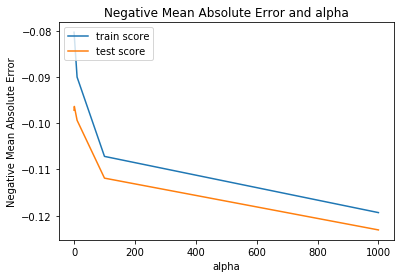

In [38]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results.head()

# Plotting mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<hr>

**Ridge Linear Regression.**

In [39]:
model_cv.best_params_

{'alpha': 1}

In [40]:
alpha = 1
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

**Results.**

In [41]:
ridge.intercept_ # constant term.

0.37278859905716716

In [42]:
for x,y in zip(X.columns, ridge.coef_): # coefficients of features.
    print(x, y*100)

chocolate 17.395113450849347
fruity 7.720639686401806
caramel 2.907233687069852
peanutyalmondy 9.094281846468219
nougat 1.3764952562194068
crispedricewafer 7.3018214678400275
hard -4.442497827630216
bar 0.7309590882068128
pluribus -0.14235867560122578
